In [50]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import datetime as dt
import matplotlib.font_manager as fm
from matplotlib import rc

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

font_name = fm.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [8]:
merge_data = pd.read_csv('공공자전거 대여소 정보_201905.csv', encoding='utf-8')
merge_data.drop(columns=['대여소명','거치대수'])

,구분,대여소번호,위도,경도
0,마포구,101,37.549561,126.905754
1,마포구,102,37.556000,126.910454
2,마포구,103,37.554951,126.910835
3,마포구,104,37.550629,126.914986
4,마포구,105,37.550007,126.914825
5,마포구,106,37.548645,126.912827
6,마포구,107,37.557510,126.918503
7,마포구,108,37.552746,126.918617
8,마포구,109,37.547691,126.919983
9,서대문구,110,37.568199,126.917847


In [19]:
def create_data(csv):
    data = pd.read_csv(csv+'.csv', encoding='utf-8', parse_dates=['대여일시'])
    data = data.merge(merge_data, left_on='대여소번호', right_on='대여소번호')
    data = data.drop(columns=['자전거번호','대여거치대','반납거치대'])
    data = data.rename(columns={'구분':'대여소 자치구', '위도':'대여소 위도', '경도':'대여소 경도'})
    data = data.merge(merge_data, left_on='반납대여소번호', right_on='대여소번호')
    data = data.drop(columns=['대여소번호_y','대여소명_x','거치대수_x','대여소명_y','거치대수_y'])
    data = data.rename(columns={'대여소번호_x':'대여소번호','구분':'반납 대여소 자치구', '위도':'반납 대여소 위도', '경도':'반납 대여소 경도'})
    return data

In [32]:
data_0915 = create_data('서울특별시 공공자전거 대여정보_201905')

In [33]:
data_0915.head()

,대여일시,대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여소 자치구,대여소 위도,대여소 경도,반납 대여소 자치구,반납 대여소 위도,반납 대여소 경도
0,2019-05-01 00:01:07,1908,해원리바파크 육교 밑,2019-05-01 00:03:52,1957,구일고등학교 정문,2,480.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329
1,2019-05-01 22:54:30,1908,해원리바파크 육교 밑,2019-05-01 22:57:27,1957,구일고등학교 정문,2,470.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329
2,2019-05-02 18:44:56,1908,해원리바파크 육교 밑,2019-05-02 18:48:12,1957,구일고등학교 정문,2,530.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329
3,2019-05-02 20:19:16,1908,해원리바파크 육교 밑,2019-05-02 20:22:29,1957,구일고등학교 정문,3,63010.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329
4,2019-05-03 00:16:48,1908,해원리바파크 육교 밑,2019-05-03 00:21:10,1957,구일고등학교 정문,4,310.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329


In [34]:
data_0915.dtypes

대여일시          datetime64[ns]
대여소번호                  int64
대여대여소명                object
반납일시                  object
반납대여소번호                int64
반납대여소명                object
이용시간                   int64
이용거리                 float64
대여소 자치구               object
대여소 위도               float64
대여소 경도               float64
반납 대여소 자치구            object
반납 대여소 위도            float64
반납 대여소 경도            float64
dtype: object

In [35]:
data_0915['day'] = data_0915['대여일시'].dt.day
data_0915['hour'] = data_0915['대여일시'].dt.hour
data_0915['minute'] = data_0915['대여일시'].dt.minute
data_0915['dayofweek'] = data_0915['대여일시'].dt.dayofweek

In [41]:
data_0915_trip = data_0915[data_0915['dayofweek']>=5]
data_0915_trip = data_0915_trip[data_0915['hour']>9]

C:\Users\kwanyong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [42]:
data_0915_trip.head()

,대여일시,대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여소 자치구,대여소 위도,대여소 경도,반납 대여소 자치구,반납 대여소 위도,반납 대여소 경도,day,hour,minute,dayofweek
17,2019-05-04 15:39:52,1908,해원리바파크 육교 밑,2019-05-04 15:43:07,1957,구일고등학교 정문,3,480.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,15,39,5
18,2019-05-04 16:32:24,1908,해원리바파크 육교 밑,2019-05-04 16:36:17,1957,구일고등학교 정문,3,480.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,16,32,5
19,2019-05-04 20:30:52,1908,해원리바파크 육교 밑,2019-05-04 20:33:18,1957,구일고등학교 정문,2,280.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,20,30,5
20,2019-05-04 22:08:55,1908,해원리바파크 육교 밑,2019-05-04 22:12:21,1957,구일고등학교 정문,3,530.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,22,8,5
21,2019-05-04 23:12:02,1908,해원리바파크 육교 밑,2019-05-04 23:15:21,1957,구일고등학교 정문,3,560.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,23,12,5


In [43]:
data_0915_trip.to_csv('0915_주말여행.csv')

In [45]:
data_0915_trip.describe()

,대여소번호,반납대여소번호,이용시간,이용거리,대여소 위도,대여소 경도,반납 대여소 위도,반납 대여소 경도,day,hour,minute,dayofweek
count,420317.000000,420317.000000,420317.000000,420317.000000,420317.000000,420317.000000,420317.000000,420317.000000,420317.000000,420317.000000,420317.000000,420317.000000
mean,1220.205440,1220.261051,36.876743,5817.874723,37.546001,126.995451,37.545911,126.995615,14.713174,17.235391,29.429133,5.431117
std,868.290723,867.545793,35.421481,11726.188850,0.045566,0.086337,0.045388,0.086600,8.081586,3.565776,17.319305,0.495233
min,101.000000,101.000000,0.000000,0.000000,37.437271,126.798599,37.437271,126.798599,4.000000,10.000000,0.000000,5.000000
25%,502.000000,502.000000,11.000000,1480.000000,37.513248,126.920128,37.513359,126.919983,5.000000,15.000000,14.000000,5.000000
50%,1153.000000,1153.000000,26.000000,3050.000000,37.541363,127.007210,37.540981,127.007439,12.000000,18.000000,29.000000,5.000000
75%,1906.000000,1906.000000,52.000000,6480.000000,37.570198,127.067741,37.570141,127.067879,25.000000,20.000000,44.000000,6.000000
max,3542.000000,3542.000000,3934.000000,255730.000000,37.689720,127.180267,37.689720,127.180267,26.000000,23.000000,59.000000,6.000000


In [55]:
data_temp1 = data_0915_trip[data_0915_trip['이용시간'] < 100]

In [59]:
data_temp2 = data_0915_trip[data_0915_trip['이용시간'] < 120]

In [61]:
data_temp3 = data_0915_trip[data_0915_trip['이용거리'] < 3050]
data_temp4 = data_0915_trip[data_0915_trip['이용거리'] < 6480]

In [57]:
data_temp1

,대여일시,대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여소 자치구,대여소 위도,대여소 경도,반납 대여소 자치구,반납 대여소 위도,반납 대여소 경도,day,hour,minute,dayofweek
17,2019-05-04 15:39:52,1908,해원리바파크 육교 밑,2019-05-04 15:43:07,1957,구일고등학교 정문,3,480.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,15,39,5
18,2019-05-04 16:32:24,1908,해원리바파크 육교 밑,2019-05-04 16:36:17,1957,구일고등학교 정문,3,480.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,16,32,5
19,2019-05-04 20:30:52,1908,해원리바파크 육교 밑,2019-05-04 20:33:18,1957,구일고등학교 정문,2,280.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,20,30,5
20,2019-05-04 22:08:55,1908,해원리바파크 육교 밑,2019-05-04 22:12:21,1957,구일고등학교 정문,3,530.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,22,8,5
21,2019-05-04 23:12:02,1908,해원리바파크 육교 밑,2019-05-04 23:15:21,1957,구일고등학교 정문,3,560.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,23,12,5
22,2019-05-04 23:28:57,1908,해원리바파크 육교 밑,2019-05-04 23:31:22,1957,구일고등학교 정문,2,450.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,23,28,5
23,2019-05-04 23:27:26,1908,해원리바파크 육교 밑,2019-05-04 23:32:37,1957,구일고등학교 정문,5,360.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,23,27,5
24,2019-05-04 23:46:16,1908,해원리바파크 육교 밑,2019-05-04 23:49:48,1957,구일고등학교 정문,3,520.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,4,23,46,5
27,2019-05-05 19:13:46,1908,해원리바파크 육교 밑,2019-05-05 19:17:08,1957,구일고등학교 정문,2,520.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,5,19,13,6
28,2019-05-05 19:28:29,1908,해원리바파크 육교 밑,2019-05-05 19:38:12,1957,구일고등학교 정문,9,570.0,구로구,37.495285,126.872162,구로구,37.493401,126.874329,5,19,28,6


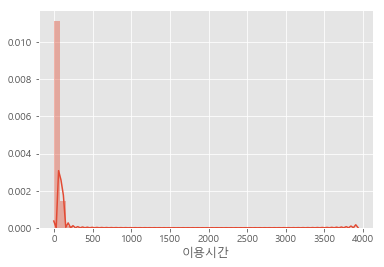

In [52]:
sns.distplot(data_0915_trip['이용시간'])

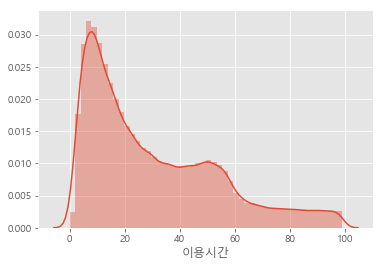

In [58]:
sns.distplot(data_temp1['이용시간'])

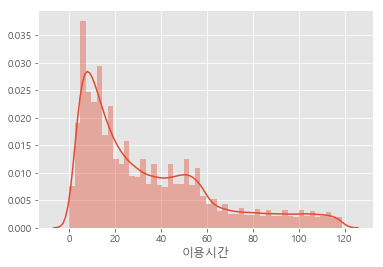

In [60]:
sns.distplot(data_temp2['이용시간'])

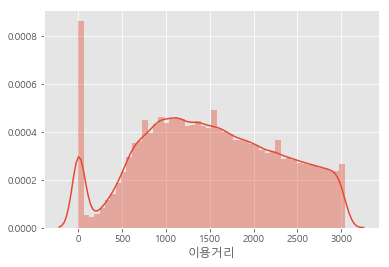

In [62]:
sns.distplot(data_temp3['이용거리'])

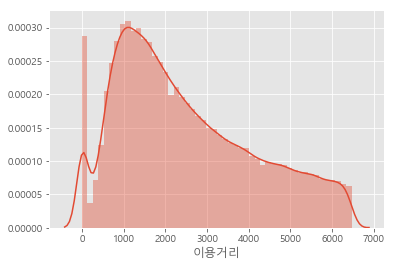

In [63]:
sns.distplot(data_temp4['이용거리'])

In [64]:
data_4555 = data_0915_trip[data_0915_trip['이용시간'] >= 45]
data_4555 = data_4555[data_4555['이용시간'] <= 55]

In [65]:
data_4555.to_csv('data_4555.csv')

In [68]:
data_under10 = data_0915_trip[data_0915_trip['이용시간'] <= 10]

In [69]:
data_under10.to_csv('data_under10.csv')

In [83]:
data_point = data_0915_trip.groupby('대여대여소명').agg({'이용시간':'median','이용거리':'median','대여소 위도':'mean','대여소 경도':'mean'})

In [84]:
data_point.head()

,이용시간,이용거리,대여소 위도,대여소 경도
대여대여소명,,,,
(구)신한은행 중랑교지점,13.5,1870.0,37.598591,127.079819
(구)합정동 주민센터,31.5,2190.0,37.549561,126.905754
3호선 매봉역 3번출구앞,28.0,3820.0,37.486767,127.046761
419민주묘지역,18.0,2390.0,37.649673,127.013451
8삼호@ 2동 ( 간선도로),21.5,2420.0,37.493759,127.045898


In [76]:
data_point.to_csv('data_point_merge.csv')

In [85]:
data_point.sort_values(by=['이용시간'], ascending=False)

,이용시간,이용거리,대여소 위도,대여소 경도
대여대여소명,,,,
문정·가락 대여소 앞,60.5,9220.0,37.489071,127.109299
동작역 5번출구 동작주차공원,60.5,7280.0,37.503189,126.977150
여의나루역 1번출구 앞,57.0,6240.0,37.526989,126.932098
이촌1동 주민센터 뒤,56.0,6730.0,37.521282,126.973465
아크로리버뷰 부지 앞,55.0,6675.0,37.513046,127.005959
석수역1번출구 앞 (SK주유소),55.0,11450.0,37.437271,126.902687
개화동상사마을종점 버스정류장,55.0,7050.0,37.581612,126.798599
"고속터미널역 8-1번, 8-2번 출구 사이",55.0,5715.0,37.506199,127.003944
독산보도육교 앞 자전거 보관소,55.0,9350.0,37.455849,126.893143


In [86]:
data_point.sort_values(by=['이용거리'], ascending=False)

,이용시간,이용거리,대여소 위도,대여소 경도
대여대여소명,,,,
석수역1번출구 앞 (SK주유소),55.0,11450.0,37.437271,126.902687
독산보도육교 앞 자전거 보관소,55.0,9350.0,37.455849,126.893143
문정·가락 대여소 앞,60.5,9220.0,37.489071,127.109299
성지아파트 옆 도로변,43.0,8370.0,37.451321,126.897621
독산근린공원 입구,54.0,8190.0,37.464550,126.883728
도봉산광역환승센터앞,47.0,7835.0,37.689720,127.045197
현대자동차서비스 앞,50.0,7770.0,37.531422,126.951500
독산역 2번출구 자전거주차장,49.0,7730.0,37.466530,126.888718
비계 버스정류소,51.0,7700.0,37.506359,126.969078
